<div>

<img vertical-align: middle src="images/images.png"/> <h1> Analyzing people’s responses on Twitter about the population hitting the 8 billion mark </h1> <img align=right src="images/istockphoto-482789089-612x612.jpg"/> 

</div>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_colwidth = 80
import os

#All supportive functions are in the twitter_libraries.py
from twitter_libraries import US_state_abrev,\
                                create_df, clean_text, \
                                    apply_gender_model, get_sentiment, \
                                        get_metrics, determine_topic, \
                                        allocate_topics_and_export, \
                                                get_state, \
                                                    get_word_withtin_target_sent_non_nlp

In [3]:
#Query Params
file_name = 'scraped-tweets/population-tweets-raw'
search = ['population'] #Query to search within twitter
#location = " geocode:49.25208599342474,-123.03391418427883,100000km"                                                                    
location = None                                                                    
search = list(set(search))

In [4]:
#Scrape Data - Do not run! if Needed #This run was to prove functionallity of the scraping
# the query will search from 7 days ago until today (0 day)
df = create_df(name = file_name, random_food = search, location = location)

Query without until
This is the QUERY: population -filter:links -filter:retweets -filter:replies
...Waiting for API to allow more calls
getting tweets before 1598119021173702655
...Waiting for API to allow more calls
...200 tweets downloaded so far
getting tweets before 1598097897513684991
...Waiting for API to allow more calls
...300 tweets downloaded so far
getting tweets before 1598076102160928776
...Waiting for API to allow more calls
...400 tweets downloaded so far
getting tweets before 1598057224240508928
...Waiting for API to allow more calls
...500 tweets downloaded so far
getting tweets before 1598036552760037375
...Waiting for API to allow more calls
...600 tweets downloaded so far
getting tweets before 1598021747454148607
...Waiting for API to allow more calls
...700 tweets downloaded so far
getting tweets before 1598012318427717631
...Waiting for API to allow more calls
...800 tweets downloaded so far
getting tweets before 1597995926811209728
...Waiting for API to allow mor

In [5]:
df.head(3)

,date,location,username,search,tweet,id,name,description,retweet_count,source,favourites_count,followers_count,friends_count,profile_background_color,verified
0,2022-12-01 02:34:35,not_determined,poppingseverely,population,also pls as a collective population disregard your stereotypes of autism. i...,1.598143e+18,barbiana.,rt account w/ occasional opinionated tweets || no xy chromosome follows,0.0,Twitter for iPhone,162662.0,976.0,337.0,F5F8FA,False
1,2022-12-01 02:33:26,not_determined,milneice,population,"“10 percent of any population is cruel, no matter what, and 10 percent is me...",1.598143e+18,Jim Milne,"I may not have gone where I intended to go, but I think I have ended up wher...",0.0,Twitter Web App,125107.0,777.0,1356.0,C0DEED,False
2,2022-12-01 02:32:19,not_determined,Realralphieboy,population,"Remember that 93% of the US population is normal, it’s the 7% that are crazy...",1.598143e+18,@ralphieboy,"✝️🇺🇸 🆓 🚫💉#Patriot #1A #2A Independent, Free Thinker, Freedom Fighter😏These a...",0.0,Twitter for iPhone,1601.0,12344.0,9891.0,C0DEED,False


In [ ]:
#Import only once
#df.to_csv("{}.csv".format(file_name), index = False)

In [15]:
#Read the values, drop duplicated and get state, this bring the actual values
df = pd.read_csv("{}.csv".format(file_name))
df = df.drop_duplicates()
print("Shape", df.shape)

#Apply function to get the sate 
df['state'] = df['location'].apply(lambda x: get_state(x))

Shape (22685, 15)


In [16]:
df.sample(3)

,date,location,username,search,tweet,id,name,description,retweet_count,source,favourites_count,followers_count,friends_count,profile_background_color,verified,state
21111,2022-11-10 13:53:39,not_determined,islamabad50,population,IK has it completely wrong - a 2/3 majority (by any party) is not good for c...,1.590704e+18,-Farid🇵🇰,Keep Calm and Carry On,1.0,Twitter for iPhone,9744.0,513.0,498.0,FCEBB6,False,no_state
9847,2022-11-15 13:02:59,not_determined,TheNewImpostor,population,The human population reached 8 billion this week. How much do you agree or d...,1.592503e+18,Dr Nuke ✴️,"Social psychologist, harm reduction pioneer.\nFreelance drugs researcher (3D...",0.0,Twitter Web App,12088.0,7793.0,1989.0,FCEBB6,False,no_state
9672,2022-11-15 13:41:35,not_determined,floyxcom,population,"🌎 The current world population has exceeded 8,000,000,000 people.\n\nMeanwhi...",1.592513e+18,Floyx.com,"We exist to unlock human connection by providing security, identity, fairnes...",25.0,Twitter Web App,1197.0,21642.0,115.0,F5F8FA,False,no_state


In [9]:
#Apply Cleaning function from twitter libraries
df = clean_text(df)
df.sample(3)

,date,location,username,search,tweet,id,name,description,retweet_count,source,favourites_count,followers_count,friends_count,profile_background_color,verified,state
17829,2022-11-12 02:10:30,not_determined,IslandRegistry,population,kvewisong colony\n area: 222 sqkm\n population: 326\n terrain: shim...,1.591252e+18,The Island Registry,Records of strange islands with a melancholy magical realism aesthetic. By @...,0.0,The Island Registry,2.0,10.0,15.0,000000,False,no_state
386,2022-11-18 15:52:28,not_determined,AsexualLevi,population,welcome to the friendzone population: you,1.593633e+18,Levi Ackerman,I'm a bot and I hate yaoi,0.0,twittbot.net,0.0,91.0,0.0,1A1B1F,False,no_state
9406,2022-11-15 14:29:02,not_determined,claytor_marvin,population,at the current rate of just under 1% population growth in the us in 20 years...,1.592525e+18,Marvin Claytor,Retired banker,0.0,Twitter for iPhone,18.0,11.0,18.0,F5F8FA,False,no_state


In [10]:
#Load pre-build model for gender classification
df = apply_gender_model(df)
df.head(3)

,date,location,username,search,tweet,id,name,description,retweet_count,source,favourites_count,followers_count,friends_count,profile_background_color,verified,state,gender
0,2022-11-18 19:24:41,not_determined,andreasholger22,population,russia has again shelled the ukrainian power grid with artillery and rockets...,1.593687e+18,Andreas Holger 🇺🇦,Born in West-Berlin; Studied Politics and Administration; works in Zürich; O...,0.0,Twitter for iPad,5624.0,115.0,638.0,F5F8FA,False,no_state,male
1,2022-11-18 19:24:27,not_determined,DukeMotherland,population,our problem is not our population but the population of our thieves - omoyel...,1.593687e+18,ISMAEEL OLADARE OGUNSOLA,#AAC Candidate For Oyo State House Of Assembly 2023 #Eleshin2023 Donate to o...,1.0,Twitter for iPhone,46328.0,3665.0,4904.0,C0DEED,False,no_state,male
2,2022-11-18 19:24:16,not_determined,DrearySteeple,population,pakistan was created in 1947 33% of the land was covered by forests is now 5...,1.593687e+18,Dreary Steeple,"North Brit, Royal Irish, 'Blackmouth & Dissenter'. Corporates are not your f...",0.0,Twitter Web App,67362.0,375.0,667.0,F5F8FA,False,no_state,female


In [11]:
#Apply sentiment to dataset
df = get_sentiment(df)
df

,date,location,username,search,tweet,id,name,description,retweet_count,source,favourites_count,followers_count,friends_count,profile_background_color,verified,state,gender,sentiment
0,2022-11-18 19:24:41,not_determined,andreasholger22,population,russia has again shelled the ukrainian power grid with artillery and rockets...,1.593687e+18,Andreas Holger 🇺🇦,Born in West-Berlin; Studied Politics and Administration; works in Zürich; O...,0.0,Twitter for iPad,5624.0,115.0,638.0,F5F8FA,False,no_state,male,negative
1,2022-11-18 19:24:27,not_determined,DukeMotherland,population,our problem is not our population but the population of our thieves - omoyel...,1.593687e+18,ISMAEEL OLADARE OGUNSOLA,#AAC Candidate For Oyo State House Of Assembly 2023 #Eleshin2023 Donate to o...,1.0,Twitter for iPhone,46328.0,3665.0,4904.0,C0DEED,False,no_state,male,negative
2,2022-11-18 19:24:16,not_determined,DrearySteeple,population,pakistan was created in 1947 33% of the land was covered by forests is now 5...,1.593687e+18,Dreary Steeple,"North Brit, Royal Irish, 'Blackmouth & Dissenter'. Corporates are not your f...",0.0,Twitter Web App,67362.0,375.0,667.0,F5F8FA,False,no_state,female,negative
3,2022-11-18 19:22:54,not_determined,SpriterInfo1,population,ukrainian authorities are preparing the population for a complete blackout\n...,1.593686e+18,SpriterInfo,"neutral lock from Eurasian areas... monitoring, guess,power, views",0.0,Twitter for Android,65.0,891.0,64.0,F5F8FA,False,no_state,female,positive
4,2022-11-18 19:22:28,not_determined,Christo85413325,population,my thoughts and prayers are with my kurdish friends in north iraq i fought a...,1.593686e+18,The Seer (Parody),Hundreds of years. While I lay in the wet ground. Waiting in the space betwe...,0.0,Twitter for Android,44.0,146.0,2106.0,F5F8FA,False,no_state,female,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22680,2022-11-09 21:25:33,not_determined,therjmeany,population,after reading some comments on the recent new york state governor election i...,1.590456e+18,Richard James,rub some dirt in it,0.0,Twitter for iPhone,61398.0,488.0,723.0,C0DEED,False,no_state,male,neutral
22681,2022-11-09 21:22:09,not_determined,nadeensaid9,population,israeli occupation has built over 280 illegal settlements on the stolen\npal...,1.590455e+18,nadeen said,Palestinian activist ✌️🇵🇸,1.0,Twitter Web App,4017.0,418.0,820.0,F5F8FA,False,no_state,female,negative
22682,2022-11-09 21:11:38,not_determined,raybury,population,braddock had 9 murders in 14 years w a population of about 2000 that’s 32 pe...,1.590452e+18,Raybury,"Engineer. Oxford shirts, shoes, and commas. Black dads matter. Preferred pre...",0.0,Twitter for iPhone,101128.0,679.0,2407.0,C0DEED,False,no_state,female,negative
22683,2022-11-09 21:08:53,not_determined,Hope4LA,population,the number of homeless minors in 2022 (under the age of 18) was just over 65...,1.590451e+18,HOPE 4 LOS ANGELES,Action campaign to aid the homeless population in Los Angeles\n#Hope4LA,0.0,Twitter Web App,0.0,0.0,5.0,F5F8FA,False,no_state,female,positive


In [17]:
df['date'] = pd.to_datetime(df['date'])

#Looking for keywords within tweets
df['keyword_founded'] = df.tweet.\
    apply(lambda x: get_word_withtin_target_sent_non_nlp(x, 
                                                 ["8",'billion','decline','overpopulation']
                                                 ))
#Define if keywords within tweet
df['interest_topic'] = df['keyword_founded'].\
    apply(lambda x: 'non_related' if len(x) == 0 else 'related')

#Filter for word of interest
df_clean = df[df['interest_topic'] == "related"]
print("Shape", df_clean.shape)
df_clean

Shape (7342, 18)


,date,location,username,search,tweet,id,name,description,retweet_count,source,favourites_count,followers_count,friends_count,profile_background_color,verified,state,keyword_founded,interest_topic
7,2022-11-18 19:17:37,not_determined,DanielBolnick,population,Just landed 1.4 Tb of genome sequence data from 108 stickleback from a popul...,1.593685e+18,Daniel Bolnick,"Professor. Evolution, ecology, genetics & immunology. also on Danielbolnick...",0.0,Twitter Web App,22048.0,13857.0,833.0,C0DEED,False,no_state,[8],related
15,2022-11-18 19:10:29,not_determined,IslandRegistry,population,EMPEROR NEAL ISLANDS\n Area: 48 sqkm\n Population: 358\n Terrain: M...,1.593683e+18,The Island Registry,Records of strange islands with a melancholy magical realism aesthetic. By @...,0.0,The Island Registry,2.0,10.0,15.0,000000,False,no_state,[8],related
21,2022-11-18 19:03:51,not_determined,The_AmusingMuse,population,Estimated worldwide number of people who use Twitter: 1 billion.\n\n12.5% of...,1.593681e+18,The Muse,Antiheroine. Cyborg. Bibliophile. Adventurer. Professional Rabbit Hole Spelu...,0.0,Twitter for Android,82678.0,1325.0,1396.0,DBE9ED,False,no_state,[billion],related
28,2022-11-18 18:59:55,not_determined,theeswaarindex,population,Most Educated Population:\n\n1.🇨🇭Switzerland\n2.🇯🇵Japan\n3.🇸🇪Sweden\n4.🇩🇪Ger...,1.593680e+18,The Eswaar Index,"Know the world. Focus on, Economics,Art & culture, Science, Technology, Spor...",0.0,Twitter for Android,0.0,2.0,1.0,F5F8FA,False,no_state,[8],related
30,2022-11-18 18:59:44,not_determined,AntonyMargery5,population,"apable of employing 140,000 men; it had a population of 578853",1.593680e+18,厦门包养厦门资源厦门学生厦门线下包养平台泉州包养泉州资源泉州学生泉州线下包养平台金主爸爸模特糖爹,NaN,0.0,Twitter Web App,1.0,3.0,0.0,F5F8FA,False,no_state,[8],related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22673,2022-11-09 21:57:33,not_determined,WallyWonkaWordz,population,They don’t even hide it anymore.\n\nNorth Carolina: 98% counted\nPopulation:...,1.590464e+18,WallyWonka,NaN,0.0,Twitter for iPhone,30453.0,320.0,2028.0,F5F8FA,False,no_state,[8],related
22675,2022-11-09 21:56:57,not_determined,npellwood,population,"as your friend in Texas, I want to just put this here:\n\nBeto - 3,537,577 v...",1.590463e+18,nathan ellwood,creator of @eritasdaily. forever screaming at the void w/ @arleniebeanie. he...,0.0,Twitter Web App,33651.0,292.0,878.0,C6E2EE,False,no_state,[8],related
22679,2022-11-09 21:54:39,not_determined,OdinWolf74,population,Apparently global population is set to surpass 8 billion people soon. \n\nJu...,1.590463e+18,Elon '0dinWolf' Musk lazy parody account,"Yer ever lovin, karaoke singin, game playin geek and/or nerd",0.0,Twitter for Android,378.0,131.0,161.0,C0DEED,False,no_state,"[8, billion]",related
22681,2022-11-09 21:22:09,not_determined,nadeensaid9,population,Israeli occupation has built over 280 illegal settlements on the stolen\nPal...,1.590455e+18,nadeen said,Palestinian activist ✌️🇵🇸,1.0,Twitter Web App,4017.0,418.0,820.0,F5F8FA,False,no_state,[8],related


In [18]:
#Name file and Export cleaned data
file_name_clean = "scraped-tweets/population-tweets-clean"
#df_clean.to_csv("{}.csv".format(file_name_clean), index = False)

Unable to determine R home: [WinError 2] El sistema no puede encontrar el archivo especificado
c:\Users\User\anaconda3\envs\geo_env\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   0.3.5 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


R[write to console]: stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com

R[write to console]: Loading required package: future

R[write to console]: 
Attaching package: 'reshape2'


R[write to console]: The following object is masked from 'package:tidyr':

    smiths




Joining, by = "word"
fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.
  Deveaud2014... done.
   topics Griffiths2004 CaoJuan2009 Arun2010 Deveaud2014
1      25     -455409.5   0.3049905 13947.85    1.396378
2      24     -456236.3   0.3171691 13985.90    1.398211
3      23     -458222.1   0.3378695 13988.01    1.451157
4      22     -457798.7   0.3262347 14119.89    1.435189
5      21     -456308.9   0.3511631 14241.17    1.452652
6      20     -456019.5   0.3159222 14158.94    1.507742
7      19     -455536.7   0.3152716 14316.38    1.548538
8      18     -453907.2   0.3459988 14342.95    1.499901
9      17     -454283.1   0.3548217 14375.87    1.593296
10     16     -453384.5   0.3427041 14410.40    1.558744
11     15     -455452.8   0.3776202 14719.28    1.611282
12     14     -456281.2   0.4103558 14767.36    1.585819
13     13     -456532.2   0.3906006 14781.77    1.651725
14     12     -454956.3   0.3572457 14854.13    1.7

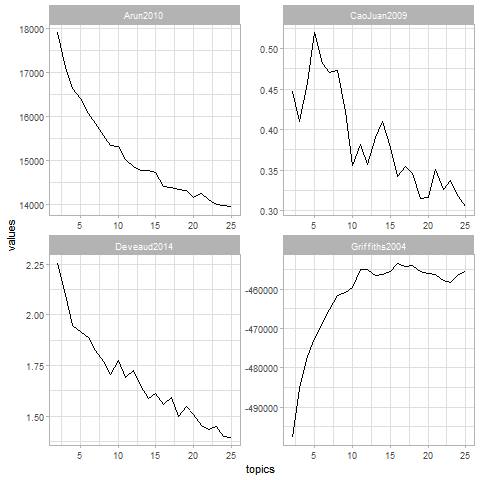

In [19]:
# Allocate Topics - Calling pre build model

path = '"'+os.getcwd().replace("\\","/")+'/{}.csv"'.format(file_name_clean)
get_metrics(path) #Run Latent Dirichlet Allocation pre-build Model and asses metrics, this requires R installed into a local
                    #machine and libraries that it will require
#This metrics determine the number optimal of topics that cam be extracted using the model

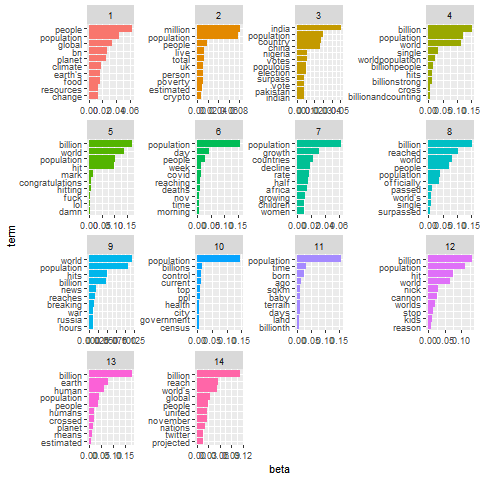

Joining, by = "id"


In [106]:
#Determining 14 alpha value for each word
n_topics = 14 #Number of topics detected
determine_topic(n_topics) #Set the number of visible topics

In [107]:
#Allocate topics
topics = ['Overall complaint population growth: Non specific topic',   
          'Overall complaint population growth: Finance, poverty, crypto',
          'Overall complaint population growth: Most Populated countries',  
          'Overall complaint population growth: People are single', 
          "General shared content hit8b",
          'Overall complaint population growth: Population control',
          'Population decline concer: Number of births, Religousness',
          "General shared content hit8b",
          'Overall complaint population growth: Russian War', 
          'Overall complaint population growth: Miscellaneous', 
          "General shared content hit8b",
          "General shared content hit8b",
          "General shared content hit8b",
          "General shared content hit8b",
          ]

file_name_clean_topic = "scraped-tweets/population-tweets-clean-{}-topic-allocated".format(n_topics)
allocate_topics_and_export(topics, '"'+os.getcwd().replace("\\","/")+'/{}.csv"'.format(file_name_clean_topic))


In [108]:
#Final Cleaning
file_name_clean_topic = "scraped-tweets/population-tweets-clean-{}-topic-allocated".format(n_topics)
df_final = pd.read_csv("{}.csv".format(file_name_clean_topic))
df_final = df_final.drop_duplicates(subset=df_final.columns.difference(['expected_topic', "topic"]))
df_final = df_final.drop("id", axis = 1).reset_index(drop = True)
df_final.to_csv(os.getcwd().replace("\\","/")+'/{}.csv'.format(file_name_clean_topic), index = False)

In [111]:
#Denny and Ousie
df = pd.read_csv("scraped-tweets/population-tweets-clean-14-topic-allocated.csv")

In [123]:
df = df[~df.tweet.str.contains("election|vote|votes|cup", regex = True)]

In [124]:
df.shape

(6380, 23)

# 1. Location of the tweets

This gives insights about the location (countries) from where the tweet was made 

In [125]:
df["country"]=df["location"].str[-2:]
df.loc[(df.country == 'ed'), 'country']='not_determined'

In [126]:
pie_data = pd.concat([df.country.value_counts()[df.country.value_counts() > 30], pd.DataFrame(index = ["Other countries"], data = [sum(df.country.value_counts()[df.country.value_counts() < 30])])])[0]

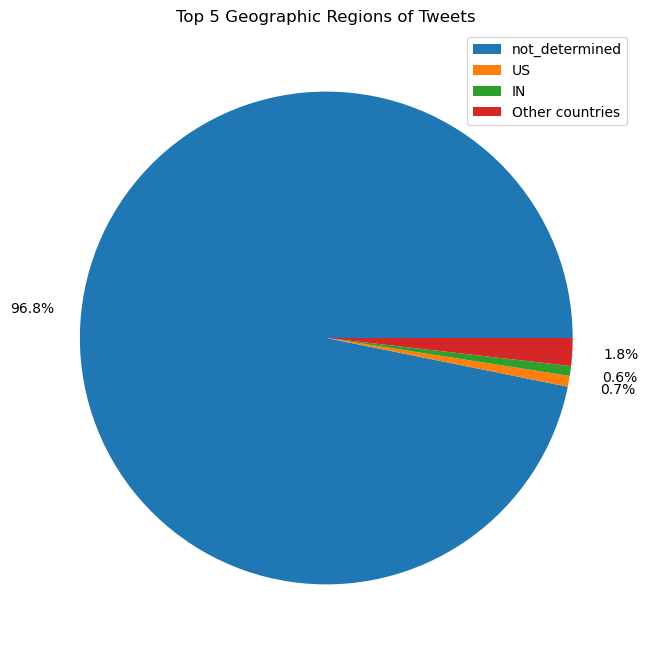

In [160]:
plt.figure(figsize=(10,8))
plt.pie(pie_data.values, autopct='%1.1f%%', pctdistance=1.2)
plt.title("Top 5 Geographic Regions of Tweets")
plt.legend(pie_data.index)
plt.show()

# 2. Top five retweeted tweet
Gives insights about top five retweeted tweet with regard to population

In [129]:
most_popular_tweet = df.sort_values('retweet_count',ascending=False).head(5).tweet.values.tolist()
most_popular_tweet_names = df.sort_values('retweet_count',ascending=False).head(5).name.values.tolist()
for i in range(5):
    print(f'\n \033[1mTweet :\033[0m {most_popular_tweet[i]} \n\n \t\t\t\t\t\t\t\t\t \
          \033[1mBy {most_popular_tweet_names[i]}\033[0m')


 Tweet : with the population reaching  billion today i just wanted to remind you that the planet has the resources to feed and house them all capitalism is the only obstacle to prosperity 

 									           By 🅹🅾️🅴🆈աrecκ ☭

 Tweet : they say the world population will hit  billion on wednesday the  biggest reasons for this are medical advancements agricultural achievements nick cannon and elon musk 

 									           By Larry The Cable Guy

 Tweet : % of serbia s total population was martyred fighting for our freedom in wwl no other nation came even close remembranceday 

 									           By Filip Filipi

 Tweet : binary sex didn t exist until the th century it was completely random which half of the population had no rights 

 									           By Venice Allan

 Tweet : today the world population surpassed  billions people  

and you re still single wow 

 									           By Harvinth 🪱kin


# 3. Five most popular twitter account in the dataset
Gives insights about the most popular accounts in tweeter who have tweeted about population

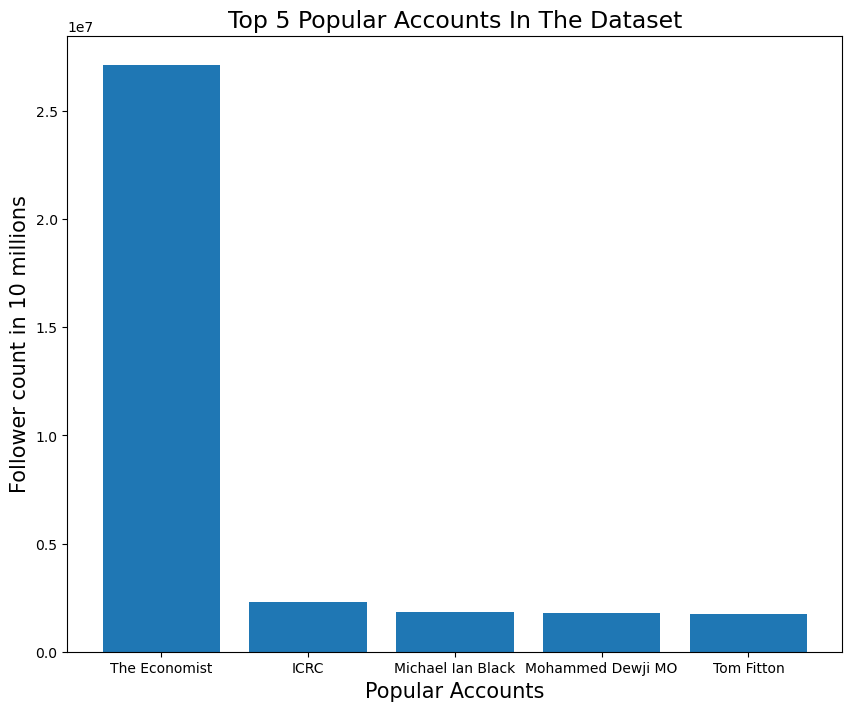

In [130]:
df_popular=df.sort_values(by="followers_count", ascending=False)[["name","followers_count"]].head(5)
plt.figure(figsize=(10,8))
plt.bar(df_popular.name,df_popular.followers_count)
plt.xlabel("Popular Accounts",size=15)
plt.ylabel("Follower count in 10 millions", size=15)
plt.title("Top 5 Popular Accounts In The Dataset", size=17)
plt.show()

# 4. Overall Sentiment in the dataset
Gives insights about the proportion of the sentiments (positive, negative and neutral) regarding population tweet

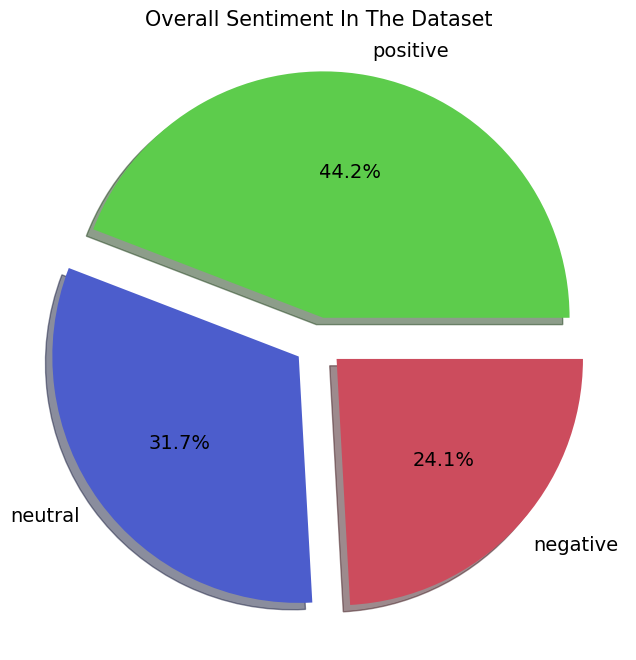

In [141]:
plt.figure(figsize=(10,8))
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, textprops={'fontsize': 14}, explode = [0.1,0.1,0.1], shadow =True, autopct='%1.1f%%', colors = ['#5dcc4c', '#4c5dcc', '#cc4c5d', 
          ])
plt.title("Overall Sentiment In The Dataset", size=15)
plt.show()

# 5. sentiment for verified and greater than 5000

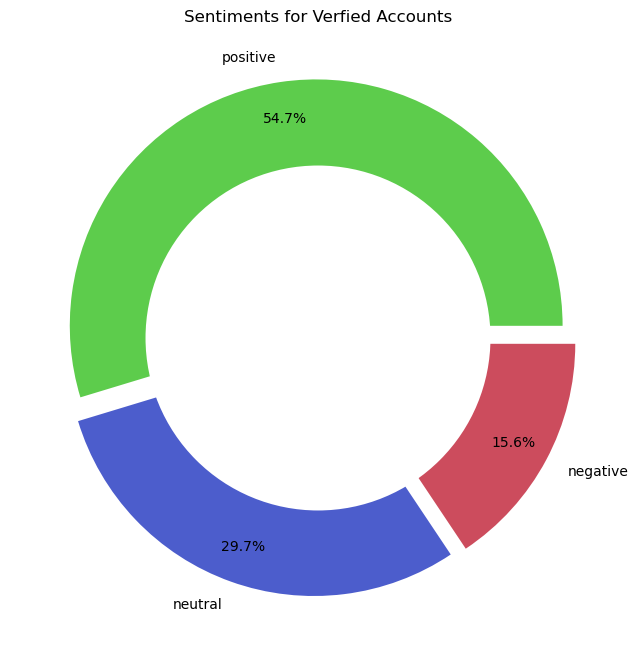

In [138]:
df_verified = pd.DataFrame(df[(df.verified==True) & (df.followers_count>5000)].sentiment.value_counts()).reset_index()
df_verified.columns=['sentiment','count']
plt.figure(figsize=(10,8))
# colors
colors = ['#5dcc4c', '#4c5dcc', '#cc4c5d', 
          ]
# explosion
explode = (0.05, 0.05, 0.05,)
  
# Pie Chart
plt.pie(df_verified["count"], colors=colors, labels=df_verified.sentiment,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Sentiments for Verfied Accounts')

plt.show()

# 6. Gender wise Sentiments
Sentiments based on Gender

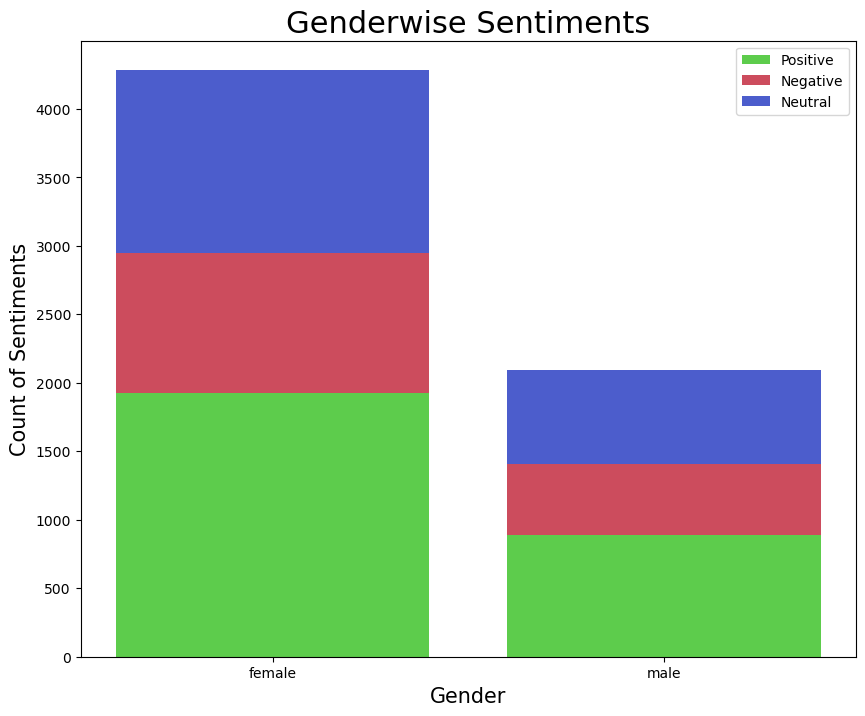

In [143]:
df_gender_sentiment=pd.DataFrame(df.groupby(["gender","sentiment"],as_index=False)["name"].count())
df_gender_sentiment.columns=["gender","sent","counts"]
genders=df_gender_sentiment.gender.unique().tolist()
positive_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "positive"].counts.values
negative_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "negative"].counts.values
neutral_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "neutral"].counts.values

plt.figure(figsize=(10,8))

plt.bar(genders, positive_sentiments, color=colors[0])
plt.bar(genders, negative_sentiments, bottom=positive_sentiments, color=colors[2])
plt.bar(genders, neutral_sentiments, bottom=positive_sentiments+negative_sentiments, color=colors[1])


plt.xlabel("Gender", size=15)
plt.ylabel("Count of Sentiments", size=15)
plt.legend(["Positive", "Negative", "Neutral"])
plt.title("Genderwise Sentiments", size=22)
plt.show()

# 7. Proportion of sentiments by Gender
Gives insights about the sentiments classified based on Gender proportion

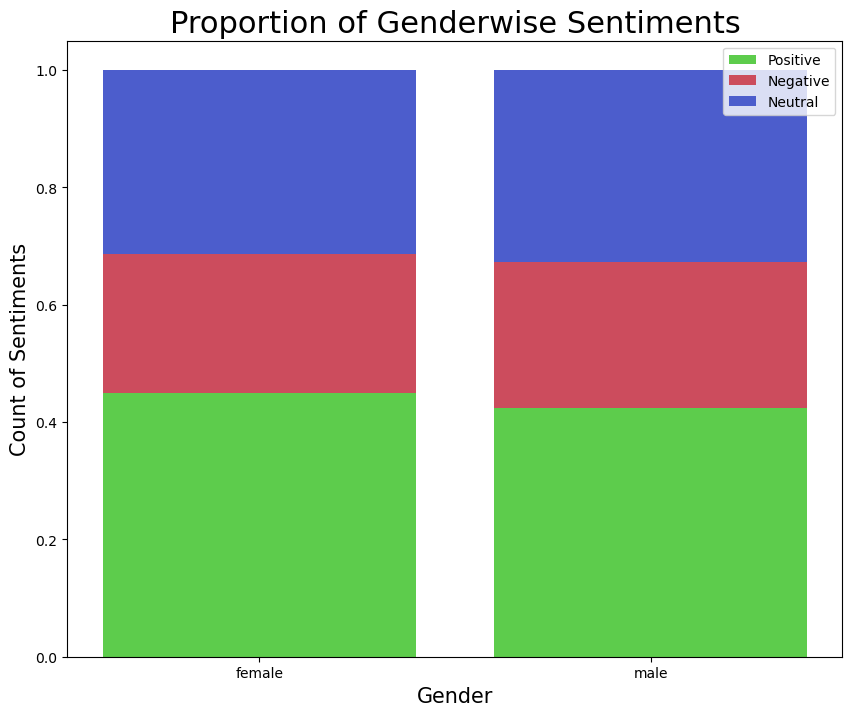

In [144]:
total_females = df.gender.value_counts()['female']
total_males = df.gender.value_counts()['male']
df_gender_sentiment['new_count']=np.where((df_gender_sentiment['gender']=="female"),
                             df_gender_sentiment.counts/total_females,
                             df_gender_sentiment.counts/total_males)
genders=df_gender_sentiment.gender.unique().tolist()
positive_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "positive"].new_count.values
negative_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "negative"].new_count.values
neutral_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "neutral"].new_count.values

plt.figure(figsize=(10,8))

plt.bar(genders, positive_sentiments, color=colors[0])
plt.bar(genders, negative_sentiments, bottom=positive_sentiments, color=colors[2])
plt.bar(genders, neutral_sentiments, bottom=positive_sentiments+negative_sentiments, color=colors[1])


plt.xlabel("Gender", size=15)
plt.ylabel("Count of Sentiments", size=15)
plt.legend(["Positive", "Negative", "Neutral"])
plt.title("Proportion of Genderwise Sentiments", size=22)
plt.show()

# 8. tweets of top five influential accounts

In [146]:
df_influential = pd.DataFrame(df[(df.verified==True) & (df.followers_count>5000)])
influential_tweets = df_influential.expected_topic.tolist()
for i in range(5):
    print(influential_tweets[i])

Overall complaint population growth: Non specific topic
General shared content hit8b
Overall complaint population growth: Non specific topic
Overall complaint population growth: Non specific topic
General shared content hit8b


# 9. Top 5 topics & their count tweeted by influential Male accounts 

In [147]:
df_verified_male = pd.DataFrame(df[(df.verified==True) & (df.followers_count>5000) & (df.gender=='male')])
influential_male_topics = df_verified_male.expected_topic.value_counts().head(5)
influential_male_topics

General shared content hit8b                                     16
Overall complaint population growth: Russian War                  5
Overall complaint population growth: Non specific topic           4
Overall complaint population growth: Finance, poverty, crypto     4
Overall complaint population growth: People are single            4
Name: expected_topic, dtype: int64

In [150]:
from textwrap import wrap

labels = [ '\n'.join(wrap(l, 20)) for l in influential_male_topics.index ]

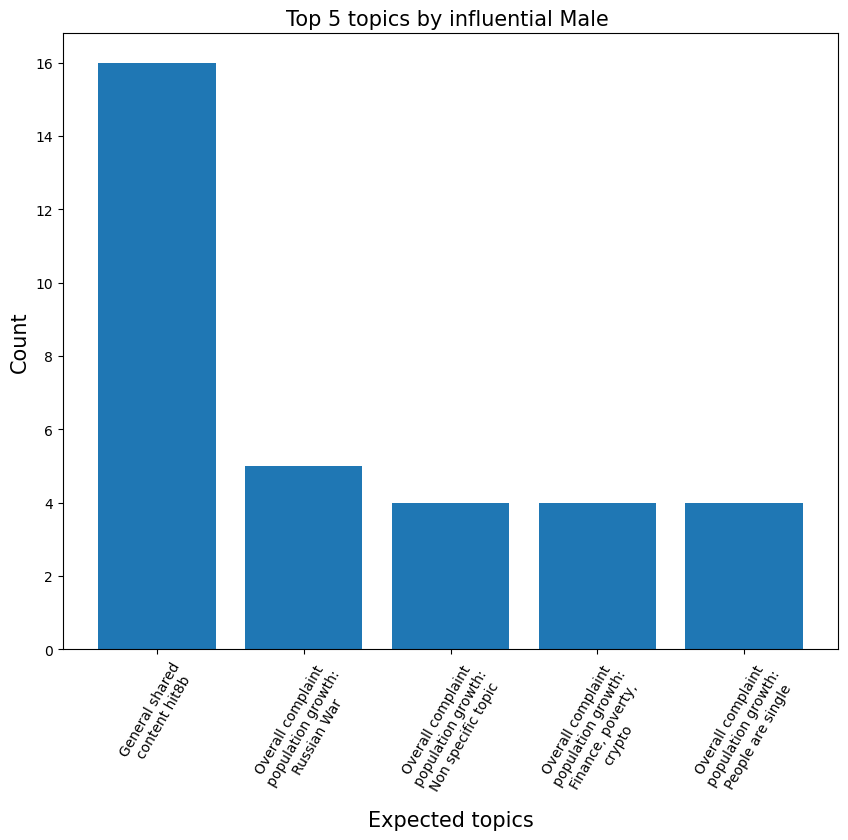

In [151]:
plt.figure(figsize=(10,8))
plt.bar(labels, influential_male_topics.values)
plt.xlabel("Expected topics",size=15 )
plt.ylabel("Count",size=15)
plt.xticks(rotation = 60)
plt.title('Top 5 topics by influential Male ',size=15)
plt.show()

# 10. Top 5 topics & their count tweeted by influential Female accounts 

In [152]:
df_verified_female = pd.DataFrame(df[(df.verified==True) & (df.followers_count>5000) & (df.gender=='female')])
influential_female_topics = df_verified_female.expected_topic.value_counts().head(5)
influential_female_topics

General shared content hit8b                                     39
Overall complaint population growth: Most Populated countries    10
Overall complaint population growth: Finance, poverty, crypto     9
Overall complaint population growth: Russian War                  7
Overall complaint population growth: People are single            6
Name: expected_topic, dtype: int64

In [153]:
labels = [ '\n'.join(wrap(l, 20)) for l in influential_female_topics.index]

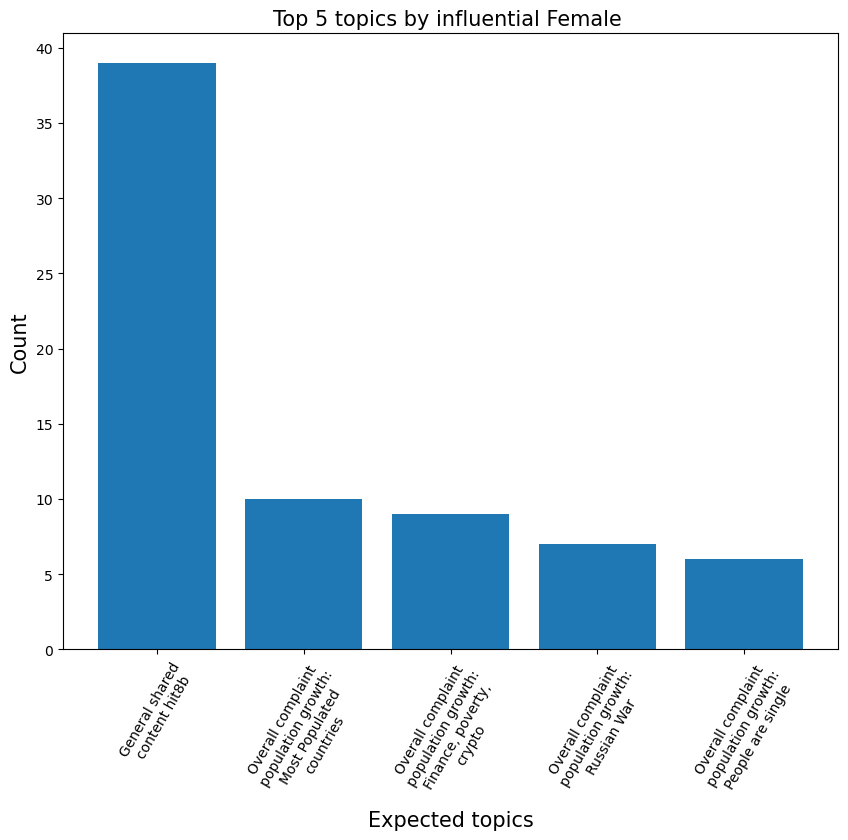

In [155]:
plt.figure(figsize=(10,8))
plt.bar(labels,influential_female_topics.values)
plt.xlabel("Expected topics",size=15 )
plt.ylabel("Count",size=15)
plt.xticks(rotation = 60)
plt.title('Top 5 topics by influential Female ',size=15)
plt.show()

# 11. User Device based Sentiments

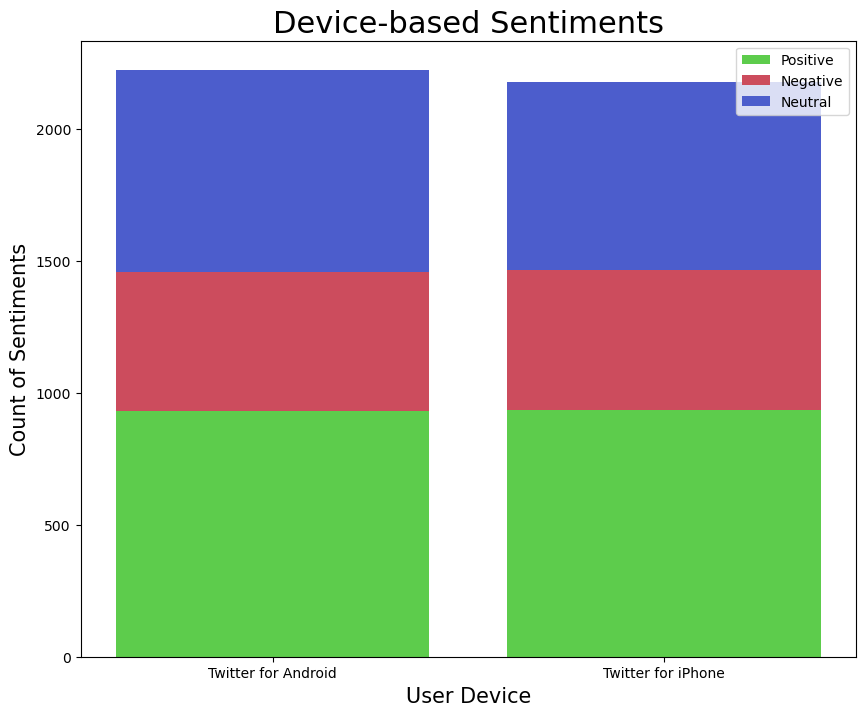

In [156]:
df_new_source = df[(df["source"]=="Twitter for Android") | (df["source"]=="Twitter for iPhone")]

df_device_sentiment=pd.DataFrame(df_new_source.groupby(["source","sentiment"],as_index=False)["name"].count())
df_device_sentiment.columns=["source","sent","counts"]

sources=df_device_sentiment.source.unique().tolist()
positive_sentiments = df_device_sentiment[df_device_sentiment.sent == "positive"].counts.values
negative_sentiments = df_device_sentiment[df_device_sentiment.sent == "negative"].counts.values
neutral_sentiments = df_device_sentiment[df_device_sentiment.sent == "neutral"].counts.values

plt.figure(figsize=(10,8))

plt.bar(sources, positive_sentiments, color=colors[0])
plt.bar(sources, negative_sentiments, bottom=positive_sentiments, color=colors[2])
plt.bar(sources, neutral_sentiments, bottom=positive_sentiments+negative_sentiments, color=colors[1])


plt.xlabel("User Device", size=15)
plt.ylabel("Count of Sentiments", size=15)
plt.legend(["Positive", "Negative", "Neutral"])
plt.title("Device-based Sentiments", size=22)
plt.show()

# 12. proportion of devices

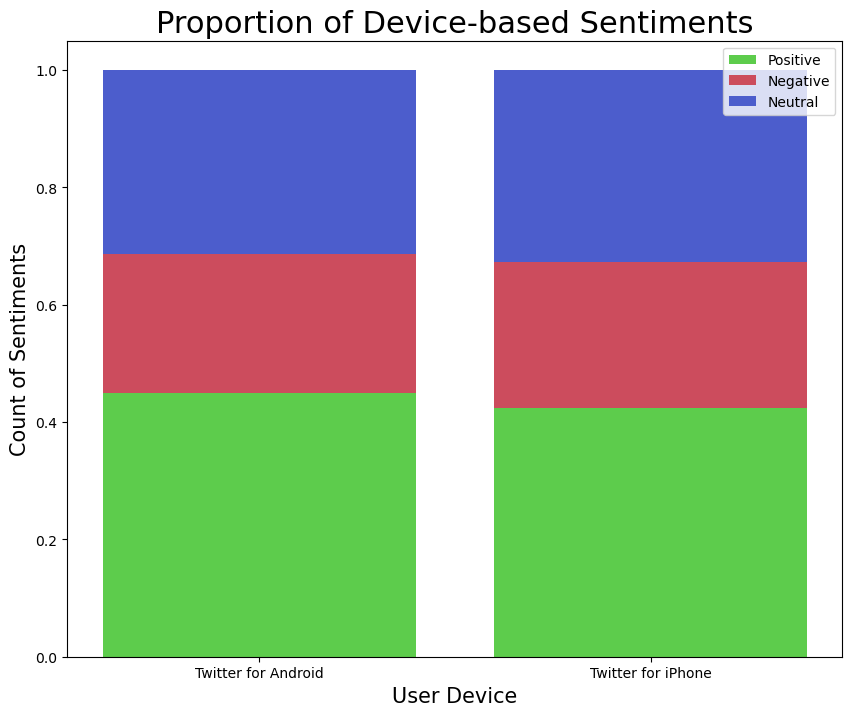

In [157]:
total_iphones = df.source.value_counts()['Twitter for iPhone']
total_androids = df.source.value_counts()['Twitter for Android']
df_device_sentiment['new_count']=np.where((df_device_sentiment['source']=="Twitter for iPhone"),
                             df_device_sentiment.counts/total_iphones,
                             df_device_sentiment.counts/total_androids)
genders=df_gender_sentiment.gender.unique().tolist()
positive_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "positive"].new_count.values
negative_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "negative"].new_count.values
neutral_sentiments = df_gender_sentiment[df_gender_sentiment.sent == "neutral"].new_count.values

plt.figure(figsize=(10,8))

plt.bar(sources, positive_sentiments, color=colors[0])
plt.bar(sources, negative_sentiments, bottom=positive_sentiments, color=colors[2])
plt.bar(sources, neutral_sentiments, bottom=positive_sentiments+negative_sentiments, color=colors[1])


plt.xlabel("User Device", size=15)
plt.ylabel("Count of Sentiments", size=15)
plt.legend(["Positive", "Negative", "Neutral"])
plt.title("Proportion of Device-based Sentiments", size=22)
plt.show()